In [1]:
import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

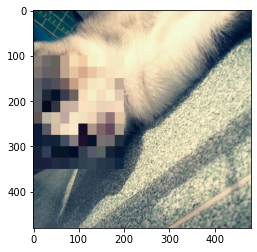

In [3]:
import matplotlib.pyplot as plt
import cv2
# from mosaic import mosaic as mosaic

# 이미지를 불러오고 모자이크 처리하기 
img = cv2.imread("cat.jpg")
mos = mosaic(img, (0, 100, 200, 350), 10)

# 이미지 출력하기 
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()


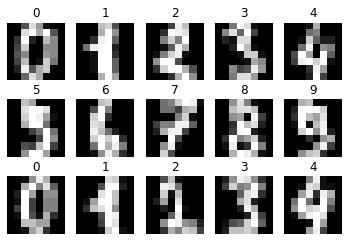

In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
digits=datasets.load_digits()

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i],cmap="gray")
    
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = svm.LinearSVC()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9638888888888889


C:\Users\Moribito\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [8]:
# from sklearn.externals import joblib
import joblib
joblib.dump(clf,'digits.pkl')

['digits.pkl']

In [10]:
import cv2
# from sklearn.externals import joblib
import joblib

def predict_digit(filename):
  # 학습한 데이터 읽어 들이기
    clf = joblib.load("digits.pkl")
    # 직접 그린 손글씨 이미지 읽어 들이기
    my_img = cv2.imread(filename)
    # 이미지 데이터를 학습에 적합하게 변환하기
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 # 흑백 반전
    # 2차원 배열을 1차원 배열로 변환하기
    my_img = my_img.reshape((-1, 64))
    # 데이터 예측하기
    res = clf.predict(my_img)
    return res[0]

# 이미지 파일을 지정해서 실행하기
n = predict_digit("my2.png")
print("my2.png = " + str(n))
n = predict_digit("my4.png")
print("my4.png = " + str(n))

my2.png = 2
my4.png = 4


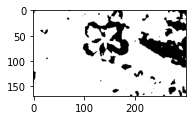

In [12]:
import cv2
import matplotlib.pyplot as plt

# 이미지 읽어 들이고 크기 변경하기 --- (*1)
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169))

# 색공간 변경하기 --- (*2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0) 
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

# 화면 왼쪽에 변환한 이미지 출력하기 --- (*3)
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

In [13]:

cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[1]

for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    
    if w < 30 or w > 200: continue
    print(x,y,w,h)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi=200)
plt.show()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_8k9tw8n\opencv\modules\imgproc\src\shapedescr.cpp:874: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::pointSetBoundingRect'


In [18]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Unicode 코드 포인트로 출현 빈도 판정하기 --- (*1)
def count_codePoint(str):
    # Unicode 코드 포인트를 저장할 배열 준비하기 --- (*2)
    counter = np.zeros(65535)

    for i in range(len(str)):
        # 각 문자를 Unicode 코드 포인트로 변환하기 --- (*3)
        code_point = ord(str[i])
        if code_point > 65535 :
            continue
        # 출현 횟수 세기 --- (*4)
        counter[code_point] += 1

    # 각 요소를 문자 수로 나눠 정규화하기 --- (*5)
    counter = counter/len(str)
    return counter

ko_str = '이것이 바로 한국어 문장입니다'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'

x_train = [count_codePoint(ko_str),count_codePoint(ja_str),count_codePoint(en_str)]
y_train = ['ko','ja','en']

clf = GaussianNB() 
clf.fit(x_train, y_train)

ko_test_str = '안녕하세요 반갑습니다'
ja_test_str = 'こんにちは'
en_test_str = 'Hello'

x_test = [count_codePoint(en_test_str),count_codePoint(ja_test_str),count_codePoint(ko_test_str)]
y_test = ['en', 'ja', 'ko']

y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred))

['en' 'ja' 'ko']
정답률 =  1.0


In [25]:
from konlpy.tag import Okt
# Okt 객체 생성
okt = Okt()

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [26]:
from gensim.models import word2vec
# 코퍼스 읽어 들이기 --- (※ 1)
sentences = word2vec.Text8Corpus('./wiki_wakati.txt')
# 모델 만들기 --- (※ 2)
model = word2vec.Word2Vec(sentences, sg=1, size=100, window=5)
# 모델 저장하기 --- (※ 3)
model.save("./wiki.model")


ModuleNotFoundError: No module named 'gensim'